# Correlation analysis for all mice : object space task
'''
Created on Wed 15 Apr 2020'''


This Notebook is intended to do the entire correlation matrix analysis 
for the different trials, object configuration, object exploration.

## Importation of libraries and definition of specific data to use

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
import scipy
cmap = cm.jet

In [7]:
mouse_vector = [56165, 56166, 32363, 32364, 32365, 32366]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,1,0,2,3]
sessions_overlapping = [1,2,2,1,3,0]
sessions_stable = [2,0,0,2,0,0]

decoding_v = 1            ## decoding version, normaly equal to one
motion_correction_v = 100 ### 100 means everything was aligned, 200 means it was also equalized
alignment_v = 1           ## alignment version
equalization_v = 0        ## equalization version
source_extraction_v = 1   ## source extraction version
component_evaluation_v = 1 ## component evaluation version
registration_v = 2        ## registration version
sf = 10                   ## sampling frequency of the original signal 
re_sf= 20                 ## value of resampling

In [8]:
file_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/calcium_activity_normed/'
timeline_file_dir = os.environ['PROJECT_DIR'] + 'neural_analysis/data/timeline/'
behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/scoring_time_vector/'
objects_dir= os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/object_positions/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/data/process/figures/correlation/'

In [11]:
correlation_matrix = []   ## correlation matrix list that will contain all the correlation matrix of multiple mice
mouse_list = []            ## mouse id list
for i in range(len(mouse_vector)):
    mouse = mouse_vector[i]
    session = sessions_stable[i]
    if session != 0:
        file_name_session_1 = 'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{100}'+\
                              '.'+f'{alignment_v}'+'.'+ f'{equalization_v}' +'.' + f'{source_extraction_v}'+'.' + \
                              f'{component_evaluation_v}' +'.'+ f'{registration_v}' + '.npy'
        time_file_session_1 =  'mouse_'+ f'{mouse}'+'_session_'+ f'{session}' +'_trial_1_v'+ f'{decoding_v}'+'.4.'+f'{1}'+\
                              '.'+f'{0}'+ '.pkl'
        beh_file_name_1 = 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'_event_'+f'{re_sf}'+'.npy'

        ##load activity and timeline
        activity = np.load(file_directory + file_name_session_1)
        timeline_file= open(timeline_file_dir + time_file_session_1,'rb')
        timeline_info = pickle.load(timeline_file)

        timeline_1 = np.zeros(len(timeline_info) + 1)
        for i in range(len(timeline_info)):
            timeline_1[i] = timeline_info[i][1]
        timeline_1[len(timeline_info)] = activity.shape[1]
        ##normalize neural activity
        neural_activity1 = activity[1:,:]
        #neural_activity1, timeline_1 = stats.normalize_neural_activity(activity=activity, timeline=timeline_info)
        ##downsample neural activity
        resample_neural_activity_mean, resample_neural_activity_std = stats.resample_matrix(neural_activity=neural_activity1,re_sf=re_sf)
        correlation_matrix.append(stats.corr_matrix(neural_activity = resample_neural_activity_mean))
        #cov_matrix.append(stats.cov_matrix(neural_activity = resample_neural_activity_mean))
        mouse_list.append(str(mouse))


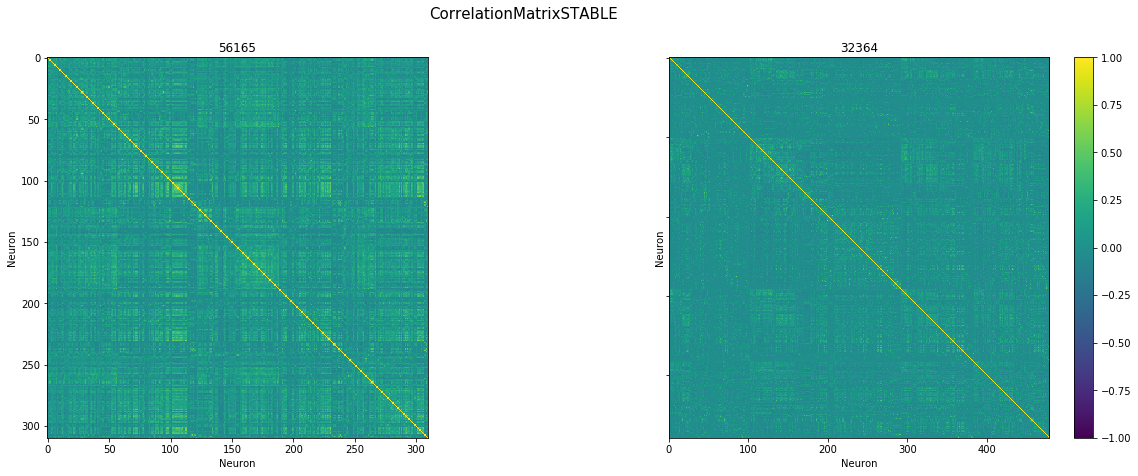

In [12]:
correlation_fig_path =  figure_path +'correlation_matrix_STABLE'+\
                        '_binsize_'+f'{re_sf}'+'.png'
figs.plot_correlation_matrix_conditions(matrix_list = correlation_matrix, save_path = correlation_fig_path,
                                        title = 'CorrelationMatrixSTABLE' , conditions = mouse_list)
